In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math

In [2]:
# Read formatted csv of city of interest
df = pd.read_csv(r'C:\Users\I539797\Documents\Thesis\Datasets\Formatted Datasets\formatted_mexicocity.csv')
df.head()

,Date,NumericIndex,OriginMovementID,DestinationMovementID,MeanTravelTimeSeconds,RangeLowerBoundTravelTimeSeconds,RangeUpperBoundTravelTimeSeconds,DayOfWeek
0,2016-01-02,1611664,4744,5084,1233,756,2010,Saturday
1,2016-01-02,1611346,4744,3135,1116,735,1694,Saturday
2,2016-01-02,1611347,4744,3136,1038,727,1481,Saturday
3,2016-01-02,1611348,4744,3140,1128,743,1712,Saturday
4,2016-01-02,1611349,4744,3154,983,809,1193,Saturday


In [3]:
# Print number of null items in each column
print(df.isnull().sum())

Date                                0
NumericIndex                        0
OriginMovementID                    0
DestinationMovementID               0
MeanTravelTimeSeconds               0
RangeLowerBoundTravelTimeSeconds    0
RangeUpperBoundTravelTimeSeconds    0
DayOfWeek                           0
dtype: int64


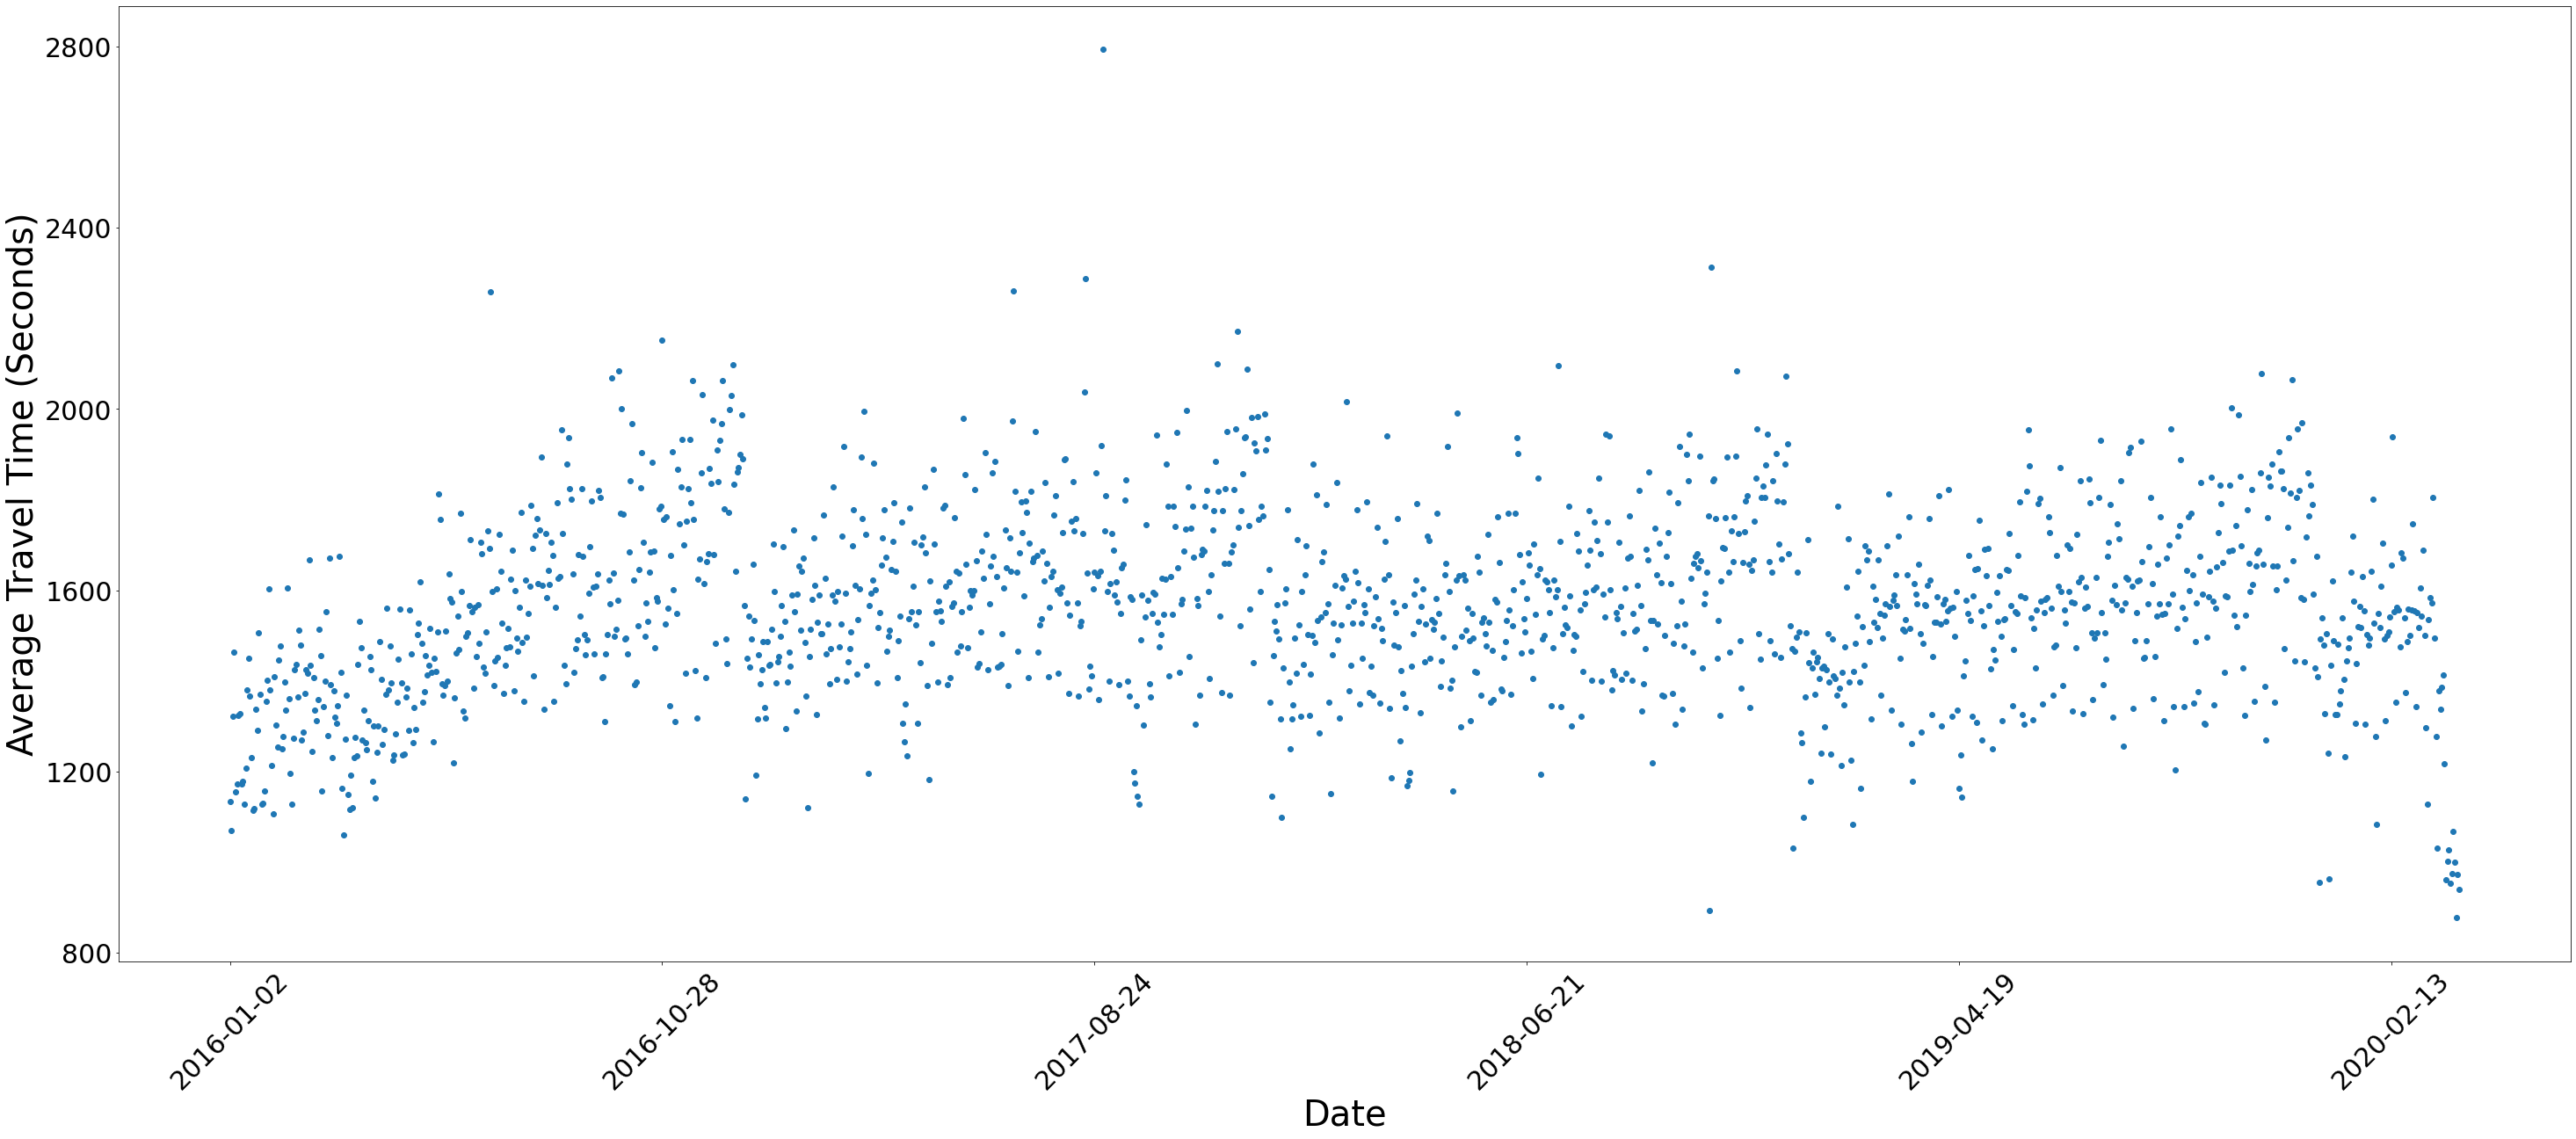

In [3]:
# Plot average travel time per date
avg_travel_times = df.groupby('Date')['MeanTravelTimeSeconds'].mean()

fig, ax = plt.subplots(figsize=(50,20))
ax.scatter(df['Date'].unique(), avg_travel_times)

plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.xlabel("Date", fontsize=40)
plt.ylabel("Average Travel Time (Seconds)", fontsize=40)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.yaxis.set_major_locator(plt.MaxNLocator(7))

In [ ]:
# Make sure that both of our axes have the same amount of datapoints
print(len(df['Date'].unique()))
print(len(df['Date'].value_counts()))
print(len(df.groupby('Date')['DestinationMovementID'].nunique()))

# Number of colored zones at a given date
numberOfZones = pd.DataFrame(df.groupby('Date')['DestinationMovementID'].nunique())
numberOfZones.sort_values('DestinationMovementID', ascending=False)


# This graph doesn't matter, rather, plot a histogram, normal distribution.
# Plot the distribution of amount of zones to which there have been recorded trips (not based on time, but from day with highest amount
#     of recorded trips to day with least amount of recorded trips)
fig, ax = plt.subplots(figsize=(50, 20))
numberOfZones.sort_values('DestinationMovementID', ascending=False).plot()

plt.title("Distribution of number of zones to which there were recorded trips at a given date (From Day with Maximum Trips to Day with Minimum Trips)")
plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.xlabel("", fontsize=40)
plt.ylabel("Daily Number of Recorded Trips", fontsize=40)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.yaxis.set_major_locator(plt.MaxNLocator(7))

c:\users\i539797\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

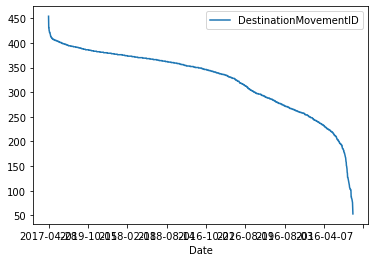

In [5]:
# Number of colored zones at a given date
dataframe = pd.DataFrame(df.groupby('Date')['DestinationMovementID'].nunique())
dataframe.sort_values('DestinationMovementID', ascending=False).plot()

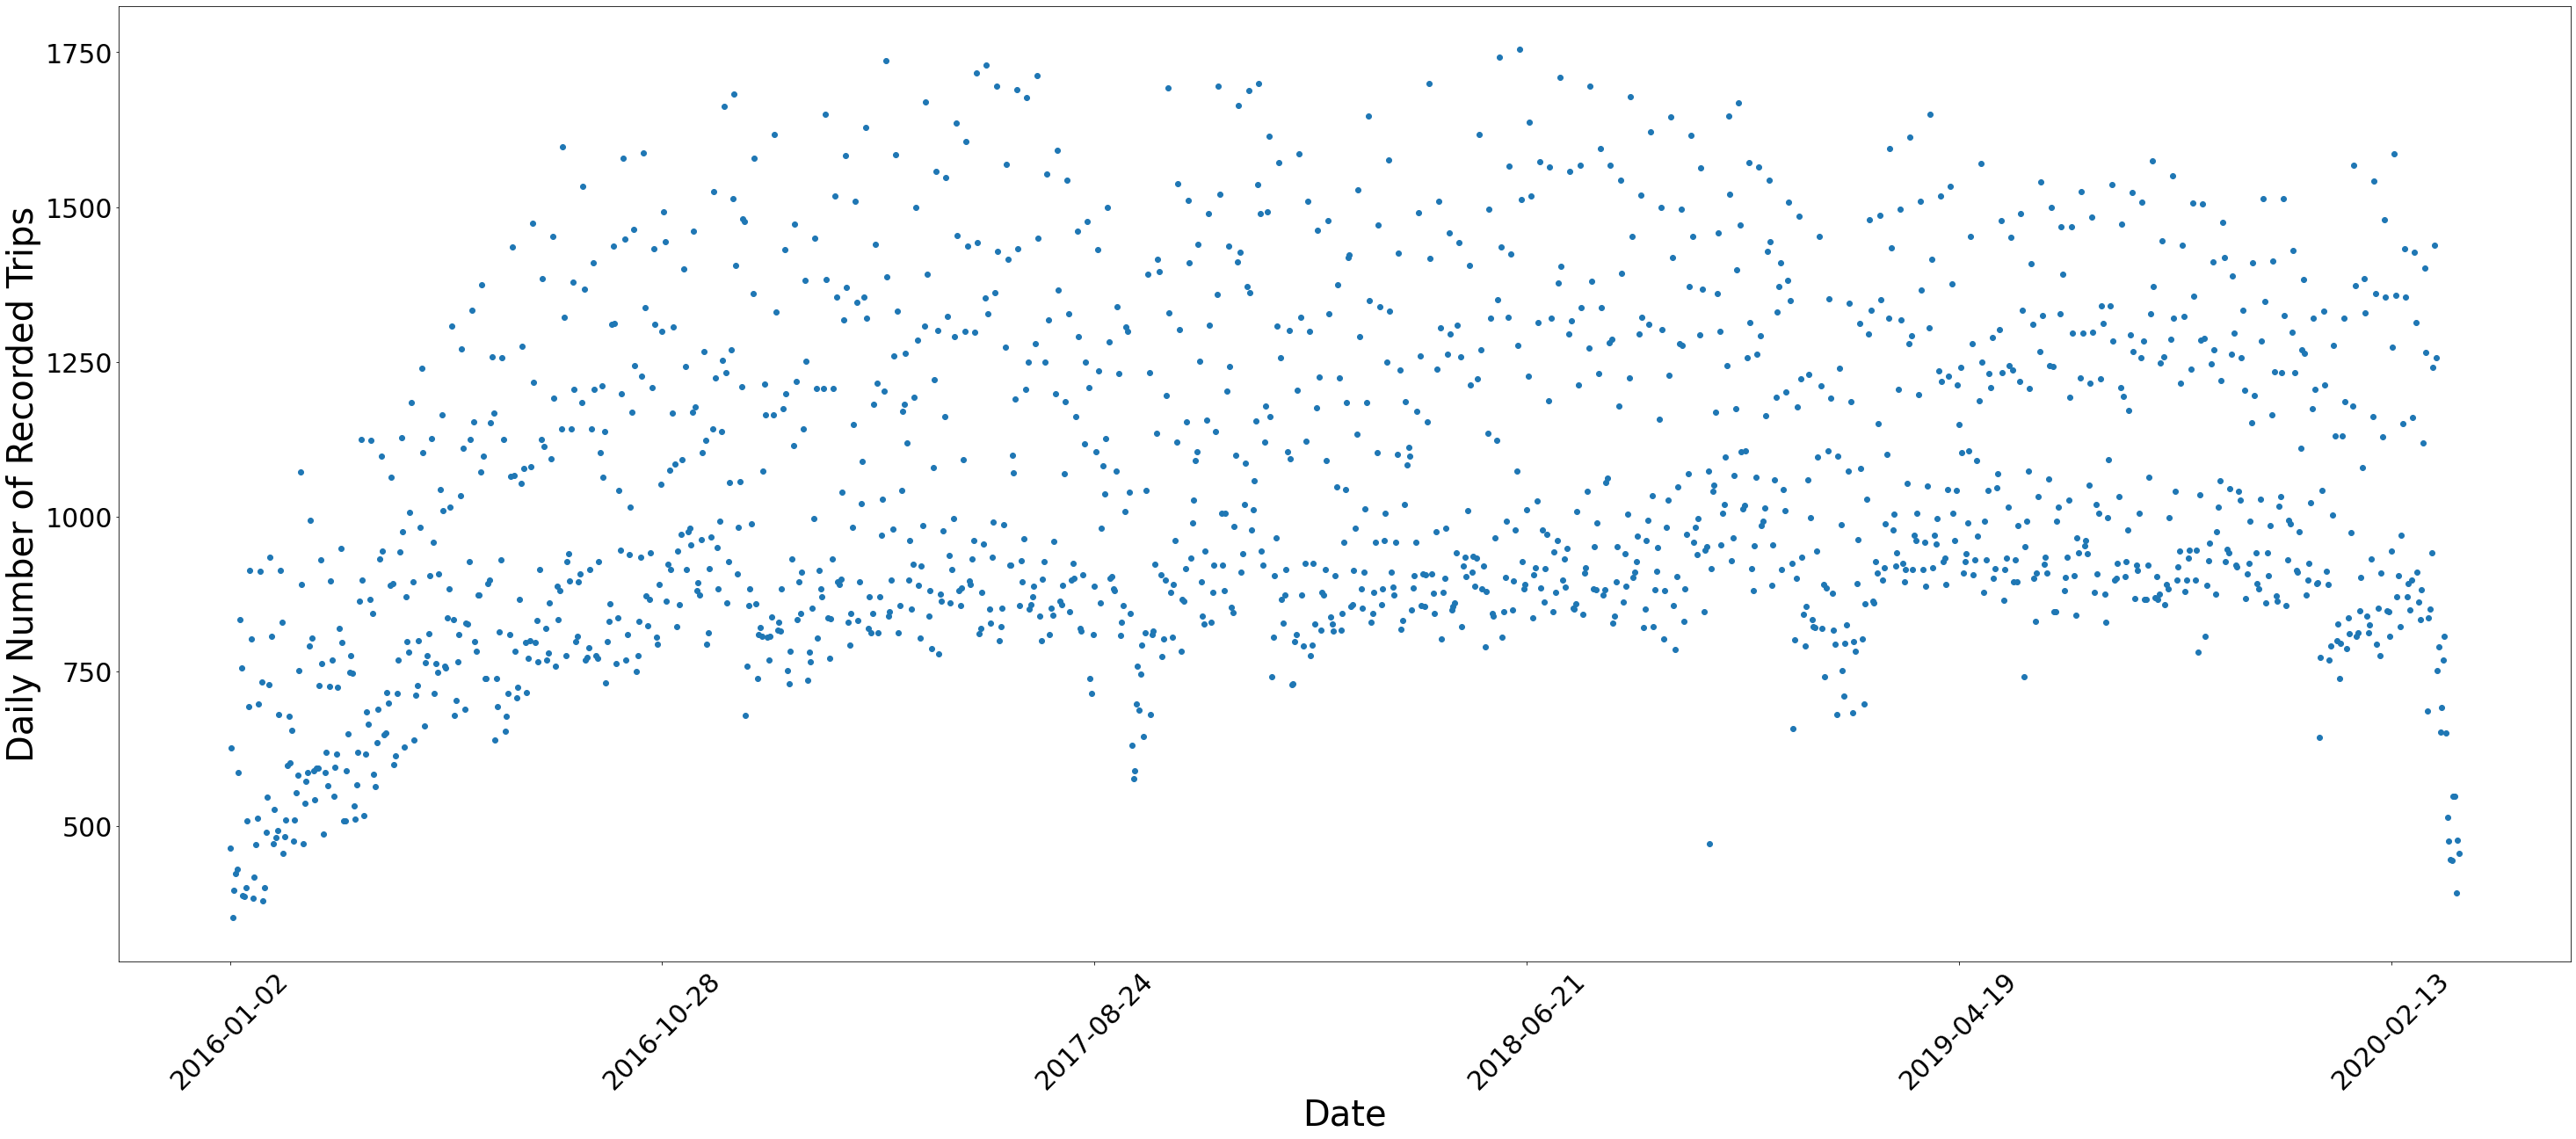

In [5]:
# Plotting the amount of recorded daily trips throught time
daily_trip_count = df.groupby('Date')['MeanTravelTimeSeconds'].count()

fig, ax = plt.subplots(figsize=(50,20))
plt.scatter(df['Date'].unique(), daily_trip_count)

# We change the fontsize of minor ticks label 
plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.xlabel("Date", fontsize=40)
plt.ylabel("Daily Number of Recorded Trips", fontsize=40)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.yaxis.set_major_locator(plt.MaxNLocator(7))

In [ ]:
# Boxplots
sns.set(style="ticks")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=df['Date'].unique(), y=df.groupby('Date')['MeanTravelTimeSeconds'], palette=["m", "g"])
sns.despine(offset=10, trim=True)

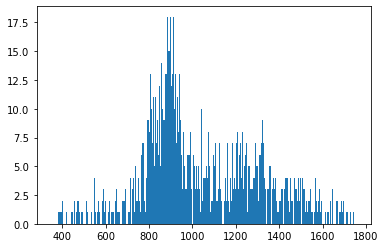

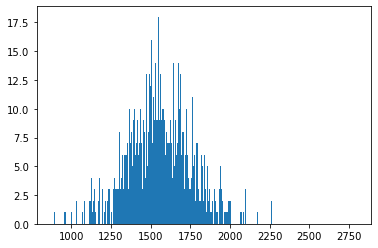

In [6]:
# Plot histogram of number of trips
width = 3 # Width of bins (bars)
n = math.ceil((df['Date'].value_counts().max() - df['Date'].value_counts().min())/width) # Define appropriate number of bins
plt.hist(df['Date'].value_counts(), n)
plt.show()

# Plot histogram of average travel times
n = math.ceil((avg_travel_times.max() - avg_travel_times.min())/width) # Define appropriate number of bins
plt.hist(avg_travel_times, n)
plt.show()

<AxesSubplot:xlabel='MeanTravelTimeSeconds'>

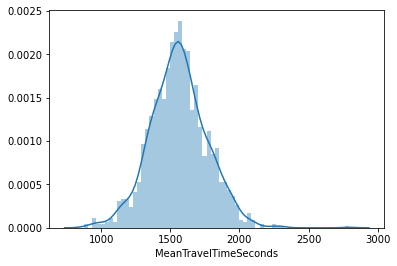

In [8]:
sns.distplot(avg_travel_times, bins=65)

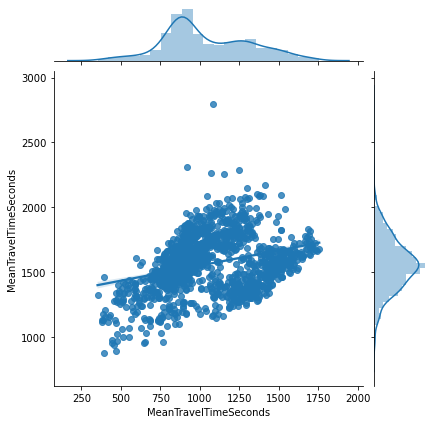

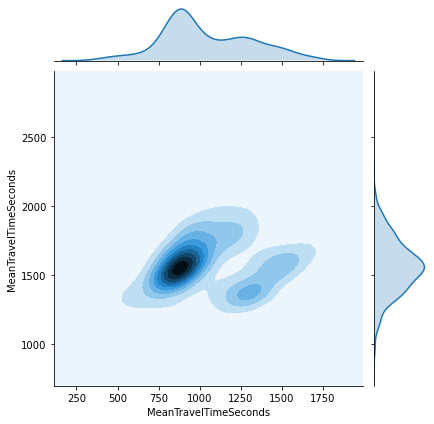

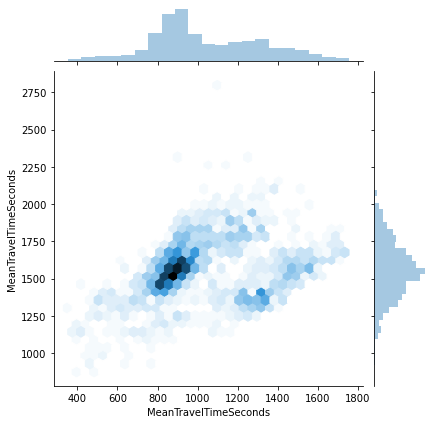

In [13]:
# Joint plot of num,ber of areas to which there were recorded trips and average travel times
sns.jointplot(x=daily_trip_count, y=avg_travel_times, kind='reg')
sns.jointplot(x=daily_trip_count, y=avg_travel_times, kind='kde')
sns.jointplot(x=daily_trip_count, y=avg_travel_times, kind='hex')

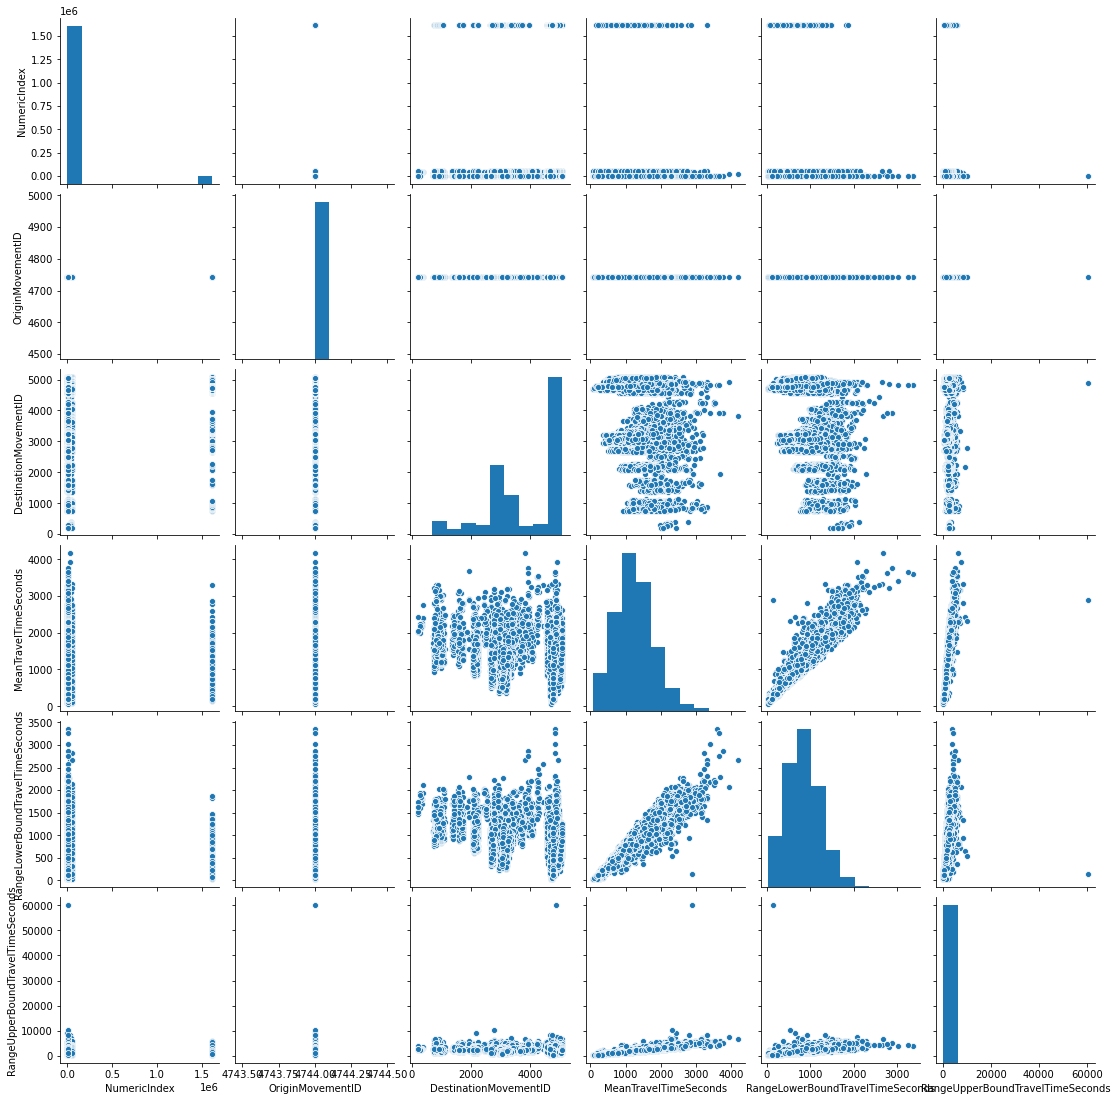

In [10]:
sns.pairplot(df[0:10000])

In [11]:
df['MeanTravelTimeSeconds'].mean()

1577.3870202554501

In [3]:
df.set_index(['Date'], inplace=True)
df.head()

,NumericIndex,OriginMovementID,DestinationMovementID,MeanTravelTimeSeconds,RangeLowerBoundTravelTimeSeconds,RangeUpperBoundTravelTimeSeconds,DayOfWeek
Date,,,,,,,
2016-01-02,1611664,4744,5084,1233,756,2010,Saturday
2016-01-02,1611346,4744,3135,1116,735,1694,Saturday
2016-01-02,1611347,4744,3136,1038,727,1481,Saturday
2016-01-02,1611348,4744,3140,1128,743,1712,Saturday
2016-01-02,1611349,4744,3154,983,809,1193,Saturday


In [4]:
df.stack().unstack()

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
# Boxplots
sns.set(style="ticks")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=df.index, y=df.groupby('Date')['MeanTravelTimeSeconds'], palette=["m", "g"])
sns.despine(offset=10, trim=True)

In [ ]:
df.set_index(['Date'], inplace=True)

In [ ]:
sns.violinplot(data=df, x=df.loc[df.index], y=df.groupby('Date')['MeanTravelTimeSeconds'])